In [7]:
#Instalamos todas las librerias a utilizar

import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
from numpy.linalg import inv

#Primero cargaremos las matrices y vectores

#Matrices

A10=np.load('A10.npy')
A100=np.load('A100.npy')
A1000=np.load('A1000.npy')

#Vectores

b10=np.load('b10.npy')
b100=np.load('b100.npy')
b1000=np.load('b1000.npy')

In [8]:
#Funcion del metodo del gradiente


def GradientMethod(A,b,eta,T):
    
    #Primero calculamos los vectores y valores propios de A
    w, v = LA.eig(A)
    
    #Calculamos el maximo valor propio que es mu
    mu=max(w)
    print("La constante de suavidad es:")
    print(mu)
    
    if eta>1/mu:
        print("¡Cuidado! Eta no es menor que 1/mu, prueba eligiendo un eta positivo que sea menor o igual a 1/mu")
    
    #Se elije un vector inicial. Eligiremos a b
    x=b
    
    #Calculamos el argumento que minimiza f, es decir x_e (x estrella)
    x_e=-np.dot(LA.inv(A),b)
    
    #Calcularemos el valor de la funcion en el minimo 
    # Ojo que como es producto matricial nos dará como resultado una matriz con un solo número que esta en la posicion 0,0
    f_e=((-1/2)*np.dot(np.transpose(b),np.dot(LA.inv(A),b)))[0][0]
    
    #Ahora realizaremos dos listas que contendra para la iteración T:
    # lista1: La norma del error en cada iteración entre x^T y x estrella 
    # lista2: El error en cada iteración entre f(x^T) y f*
    
    lista1=[]
    lista2=[]
    
    #Se realizaran T iteraciones
    
    for i in range(T):
        
        x=x-eta*(np.dot(A,x)+b)

        # Error en x
        lista1.append(LA.norm(x-x_e))
        
        # Error en f
        # Ojo que como es producto matricial nos dará como resultado una matriz con un solo número que esta en la posicion 0,0

        z=(1/2)*np.dot(np.transpose(x),np.dot(A,x))[0][0] + np.dot(np.transpose(b),x)[0][0]-f_e
        lista2.append(z)
            
    #Se retorna el ultimo valor de x^T las iteraciones y los distintos errores
    
    lista=[]
    lista.append(x)
    lista.append(lista1)
    lista.append(lista2)
    
    return lista

In [9]:
def BacktrackingMethod(A,b,T):
    
    eta=1
    
    #Se elije un vector inicial aleatorio. Por simplicidad se elegirá b
    x=b
    
    #Calculamos el argumento que minimiza f, es decir x_e (x estrella)
    x_e=-np.dot(LA.inv(A),b)
    
    #Calcularemos el valor de la funcion en el minimo 
    # Ojo que como es producto matricial nos dará como resultado una matriz con un solo número que esta en la posicion 0,0
    f_e=((-1/2)*np.dot(np.transpose(b),np.dot(LA.inv(A),b)))[0][0]
    
    #Ahora realizaremos dos listas que contendra para la iteración T:
    # lista1: La norma del error en cada iteración entre x^T y x estrella 
    # lista2: El error en cada iteración entre f(x^T) y f*
    
    lista1=[]
    lista2=[]
    
    for i in range(T):
        v=x
        x=x-eta*(np.dot(A,x)+b)
        
        f1=(1/2)*(np.dot(np.transpose(x),np.dot(A,x))[0][0])+np.dot(np.transpose(b),x)[0][0]

        f2=(1/2)*np.dot(np.transpose(v),np.dot(A,v))[0][0]+np.dot(np.transpose(b),v)[0][0]+np.dot(np.transpose(x-v),np.dot(A,v))[0][0]+(1/(2*eta))*((LA.norm(x-v))**2)
        
        z=(f1<=f2)
        
        if z==False:
            eta=eta/2
            x=v
            
        # Error en x
        lista1.append(LA.norm(x-x_e))
        
        # Error en f
        # Ojo que como es producto matricial nos dará como resultado una matriz con un solo número que esta en la posicion 0,0

        z=(1/2)*np.dot(np.transpose(x),np.dot(A,x))[0][0] + np.dot(np.transpose(b),x)[0][0]-f_e
        lista2.append(z)
        
        lista=[]
        lista.append(x)
        lista.append(lista1)
        lista.append(lista2)
        
    return lista

In [10]:
#Función del metodo de Nesterov

def NesterovMethod(A,b,T):
    
    #Lo primero que haremos será calcular el mu de A
    w, v = LA.eig(A)
    
    #Calculamos el maximo valor propio que es mu
    mu=max(w)
    print("La constante de suavidad es:")
    print(mu)
    
    eta=1/mu
    
    #Calcularemos el valor del argumento que minimiza a f
    x_e=-np.dot(LA.inv(A),b)
    
    
    #Calcularemos el valor de la funcion en el minimo 
    # ojo que como es producto matricial nos dará como resultado una matriz con un solo número que esta en la posicion 0,0
    f_e=((-1/2)*np.dot(np.transpose(b),np.dot(LA.inv(A),b)))[0][0]
    
    #Se elije un vector inicial aleatorio para x y para y. Elegiremos b por simplicidad
    x=b
    y=x
    
    #Ahora realizaremos tres listas que contendran para la iteración T:
    # lista1: La norma del error en cada iteración entre y^T y x estrella
    # lista2: El error en cada iteración entre f(y^T) y f*
    
    lista1=[]
    lista2=[]
    
    for i in range(T):
        u=x
        x=y-eta*(np.dot(A,y)+b)
        y=x+((i)/(i+3))*(x-u)
        
        #Agregamos el error entre y^T y x estrella para esta iteracion
        lista1.append(LA.norm(y-x_e))
        
        #Agregamos el error entre f(y^T) y f(x estrella) para esta iteracion
        #Ojo que como es producto matricial nos dará como resultado una matriz con un solo número que esta en la posicion 0,0

        z=(1/2)*np.dot(np.transpose(y),np.dot(A,y))[0][0] + np.dot(np.transpose(b),y)[0][0]-f_e
        lista2.append(z)
    
    lista=[]
    lista.append(y)
    lista.append(lista1)
    lista.append(lista2)
    
    #La funcion retornara una lista de 3 elementos donde:
    #-El primer elemento tiene el ultimo y^T
    #-El segundo elemento tiene la lista de la norma del error entre y^T y x estrella para cada iteracion
    #-El tercer elemento tiene la lista del error entre f(y^T) y f(x estrella) para cada iteracion

    return lista

In [11]:
#Caso A10 y b10

#Consideremos una cantidad T de iteraciones

T=1000

#Crearemos una lista desde 1 hasta T que nos ayudara posteriormente a graficar

u=[]

for j in range(T):
    u.append(j+1)
    
#Se aplican todos los metodos

#MetodoDelGradiente. Utilizaremos eta = 1/mu

w, v = LA.eig(A10)

r=1/max(w)

gm10=GradientMethod(A10,b10,r,T)

#Backtracking
bm10=BacktrackingMethod(A10,b10,T)

#MetodoDeNesterov
nm10=NesterovMethod(A10,b10,T)

La constante de suavidad es:
10.441263019930012
La constante de suavidad es:
10.441263019930012


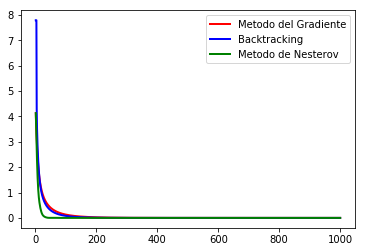

In [12]:
#Grafico en conjunto de todos los metodos del error o diferencia entre f(x^T) y f*

#Metodo del gradiente: ROJO
plt.plot(u,gm10[2],color="r", linewidth=2, label='Metodo del Gradiente')

#Backtracking: AZUL
plt.plot(u,bm10[2],color="b", linewidth=2, label='Backtracking')

#Nesterov: VERDE
plt.plot(u,nm10[2],color="g", linewidth=2, label='Metodo de Nesterov')

plt.legend(loc='best')
plt.show()

In [13]:
# OBSERVACIONES:
# Como se observa, en el gráfico no se pueden distinguir mucho las diferentes curvas dado a que la magnitud de los errores 
# es muy similar, por ende, pasaremos a graficar en escala logaritmica para poder diferenciar los distintos errores 

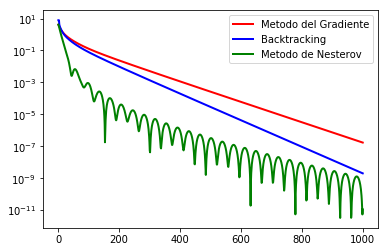

In [14]:
#Grafico en conjunto de todos los metodos del error o diferencia entre f(x^T) y f* (EN ESCALA LOGARITMICA)

#Metodo del gradiente: ROJO
plt.plot(u,gm10[2],color="r", linewidth=2, label='Metodo del Gradiente')

#Backtracking: AZUL
plt.plot(u,bm10[2],color="b", linewidth=2, label='Backtracking')

#Nesterov: VERDE
plt.plot(u,nm10[2],color="g", linewidth=2, label='Metodo de Nesterov')

plt.yscale('log')
plt.legend(loc='best')
plt.show()

In [15]:
# OBSERVACIONES:
# Es claro que tanto el método de backtracking como el método del gradiente tienen errores que decrecen de manera exponencial. 
# Se observa que el método de backtracking siempre posee errores menores que el método del gradiente. Por otro lado, 
# se observa que el método de Nesterov tiene oscilaciones en el valor de sus errores, sin embargo, estos errores son siempre 
# menores que los errores del método de backtracking y del método del gradiente.

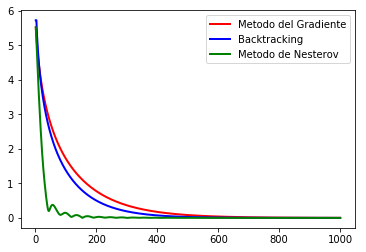

In [16]:
#Ahora graficaremos la norma de la diferencia entre x^T y x estrella para todo T

#Metodo del gradiente: ROJO
plt.plot(u,gm10[1],color="r", linewidth=2, label='Metodo del Gradiente')

#Backtracking: AZUL
plt.plot(u,bm10[1],color="b", linewidth=2, label='Backtracking')

#Nesterov: VERDE
plt.plot(u,nm10[1],color="g", linewidth=2, label='Metodo de Nesterov')

plt.legend(loc='best')
plt.show()

In [17]:
# OBSERVACIONES:
# Notemos que el método de Nesterov posee un error que es mucho menor que el del método de backtracking y que el método del 
# gradiente. Nuevamente el método de bakctracking posee un error que es menor que el del método del gradiente. Pasaremos 
# a ver estos errores en escala logarítmica para observar de mejor manera sus comportamientos.

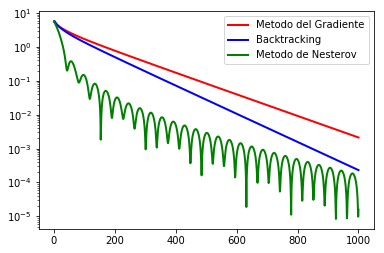

In [18]:
#Ahora graficaremos la norma de la diferencia entre x^T y x estrella para todo T (EN ESCALA LOGARITMICA)

#Metodo del gradiente: ROJO
plt.plot(u,gm10[1],color="r", linewidth=2, label='Metodo del Gradiente')

#Backtracking: AZUL
plt.plot(u,bm10[1],color="b", linewidth=2, label='Backtracking')

#Nesterov: VERDE
plt.plot(u,nm10[1],color="g", linewidth=2, label='Metodo de Nesterov')

plt.yscale('log')
plt.legend(loc='best')
plt.show()

In [19]:
# OBSERVACIONES:
# Tanto el método de backtracking como el método del gradiente tienen errores que decrecen de manera exponencial. 
# Se observa que el método de backtracking siempre posee errores menores que el método del gradiente. También, se observa 
# que el método de Nesterov tiene oscilaciones en el valor de sus errores, sin embargo, estos errores son siempre menores que 
# los errores del método de backtracking y del método del gradiente.

In [20]:
#Caso A100 y b100

#Consideremos una cantidad T de iteraciones

T=1000

#Crearemos una lista desde 1 hasta T que nos ayudara posteriormente a graficar

u=[]

for j in range(T):
    u.append(j+1)
    
#Se aplican todos los metodos

#MetodoDelGradiente. Utilizaremos eta = 1/mu

w, v = LA.eig(A100)

r=1/max(w)

gm100=GradientMethod(A100,b100,r,T)

#Backtracking
bm100=BacktrackingMethod(A100,b100,T)

#MetodoDeNesterov
nm100=NesterovMethod(A100,b100,T)

La constante de suavidad es:
100.5027345916198
La constante de suavidad es:
100.5027345916198


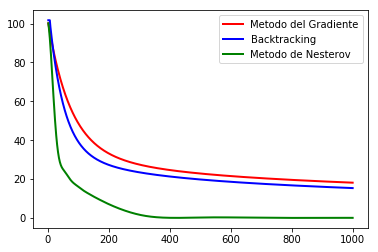

In [21]:
#Grafico en conjunto de todos los metodos del error o diferencia entre f(x^T) y f*

#Metodo del gradiente: ROJO
plt.plot(u,gm100[2],color="r", linewidth=2, label='Metodo del Gradiente')

#Backtracking: AZUL
plt.plot(u,bm100[2],color="b", linewidth=2, label='Backtracking')

#Nesterov: VERDE
plt.plot(u,nm100[2],color="g", linewidth=2, label='Metodo de Nesterov')

plt.legend(loc='best')
plt.show()

In [22]:
# OBSERVACIONES:
# Se observa que el método de backtracking y el método del gradiente poseen errores que decrecen de manera similar, aunque 
# nuevamente el método de backtracking posee errores menores que el método del gradiente. Mientras tanto, el método de Nesterov 
# posee un decrecimiento que es mucho menor que el de los otros dos métodos.

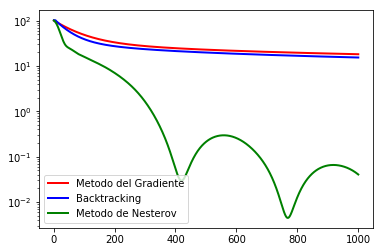

In [23]:
#Grafico en conjunto de todos los metodos del error o diferencia entre f(x^T) y f* (EN ESCALA LOGARITMICA)

#Metodo del gradiente: ROJO
plt.plot(u,gm100[2],color="r", linewidth=2, label='Metodo del Gradiente')

#Backtracking: AZUL
plt.plot(u,bm100[2],color="b", linewidth=2, label='Backtracking')

#Nesterov: VERDE
plt.plot(u,nm100[2],color="g", linewidth=2, label='Metodo de Nesterov')

plt.yscale('log')
plt.legend(loc='best')
plt.show()

In [24]:
# OBSERVACIONES:
# Como ya se había nombrado anteriormente, el método del gradiente y backtracking poseen errores muy similares y en escala 
# logarítmica esto es más evidente aún. El método de Nesterov como ya se había nombrado antes posee errores menores que los 
# otros dos métodos y nuevamente estos errores oscilan.

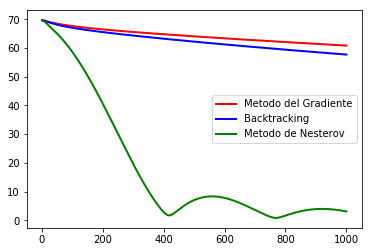

In [25]:
#Ahora graficaremos la norma de la diferencia entre x^T y x estrella para todo T

#Metodo del gradiente: ROJO
plt.plot(u,gm100[1],color="r", linewidth=2, label='Metodo del Gradiente')

#Backtracking: AZUL
plt.plot(u,bm100[1],color="b", linewidth=2, label='Backtracking')

#Nesterov: VERDE
plt.plot(u,nm100[1],color="g", linewidth=2, label='Metodo de Nesterov')

plt.legend(loc='best')
plt.show()

In [26]:
# OBSERVACIONES
# Se observa que tanto el método del gradiente como el método de backtracking poseen errores muy similares, mientras que el 
# método de Nesterov posee errores que son mucho menores que el de los otros dos métodos, y que además oscilan.  

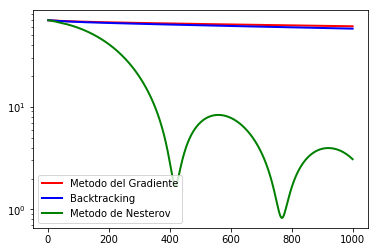

In [27]:
#Ahora graficaremos la norma de la diferencia entre x^T y x estrella para todo T (EN ESCALA LOGARITMICA)

#Metodo del gradiente: ROJO
plt.plot(u,gm100[1],color="r", linewidth=2, label='Metodo del Gradiente')

#Backtracking: AZUL
plt.plot(u,bm100[1],color="b", linewidth=2, label='Backtracking')

#Nesterov: VERDE
plt.plot(u,nm100[1],color="g", linewidth=2, label='Metodo de Nesterov')

plt.yscale('log')
plt.legend(loc='best')
plt.show()

In [28]:
# OBSERVACIONES:
# En escala logaritmica se hace más evidente la semejanza entre los errores de backtracking y del método del gradiente. 
# Al igual que en el gráfico anterior, se observa que los errores de Nesterov oscilan y son menores que los de los otros dos 
# métodos.

In [29]:
#Caso A1000 y b1000

#Consideremos una cantidad T de iteraciones

T=100

#Crearemos una lista desde 1 hasta T que nos ayudara posteriormente a graficar

u=[]

for j in range(T):
    u.append(j+1)
    
#Se aplican todos los metodos

#MetodoDelGradiente. Utilizaremos eta = 1/mu

w, v = LA.eig(A1000)

r=1/max(w)

gm1000=GradientMethod(A1000,b1000,r,T)

#Backtracking
bm1000=BacktrackingMethod(A1000,b1000,T)

#MetodoDeNesterov
nm1000=NesterovMethod(A1000,b1000,T)

La constante de suavidad es:
1000.5144032964193
La constante de suavidad es:
1000.5144032964193


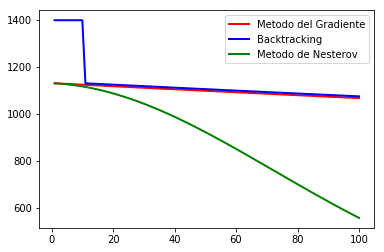

In [30]:
#Grafico en conjunto de todos los metodos del error o diferencia entre f(x^T) y f*

#Metodo del gradiente: ROJO
plt.plot(u,gm1000[2],color="r", linewidth=2, label='Metodo del Gradiente')

#Backtracking: AZUL
plt.plot(u,bm1000[2],color="b", linewidth=2, label='Backtracking')

#Nesterov: VERDE
plt.plot(u,nm1000[2],color="g", linewidth=2, label='Metodo de Nesterov')

plt.legend(loc='best')
plt.show()

In [31]:
# OBSERVACIONES:
# Se observa que el método de backtracking se mantiene constante hasta que encuentra un eta valido y luego de eso se observa 
# que tanto los errores del método del gradiente como los de backtracking son similares y se ven medianamente constantes 
# durante el tiempo, lo que indica que no esta habiendo convergencia. Por otro lado, el método de Nesterov posee errores 
# menores que los otros dos métodos y estos errores van decreciendo lo que indica convergencia. 

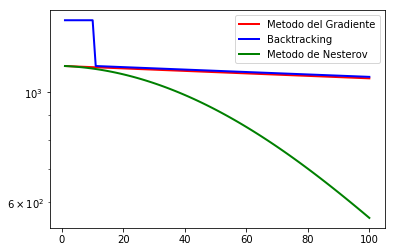

In [32]:
#Grafico en conjunto de todos los metodos del error o diferencia entre f(x^T) y f* (EN ESCALA LOGARITMICA)

#Metodo del gradiente: ROJO
plt.plot(u,gm1000[2],color="r", linewidth=2, label='Metodo del Gradiente')

#Backtracking: AZUL
plt.plot(u,bm1000[2],color="b", linewidth=2, label='Backtracking')

#Nesterov: VERDE
plt.plot(u,nm1000[2],color="g", linewidth=2, label='Metodo de Nesterov')

plt.yscale('log')
plt.legend(loc='best')
plt.show()

In [33]:
# OBSERVACIONES:
# Al igual que en el gráfico anterior lo primero que se observa es que el método de backtracking se mantiene constante hasta 
# que encuentra un $eta valido y luego de eso sus errores se comportan muy similar a los del método del gradiente y estos 
# son medianamente constantes lo que indica que no hay convergencia. Por otro lado, el método de Nesterov posee errores 
# menores que los otros dos métodos los cuales van decreciendo, lo que indica convergencia.

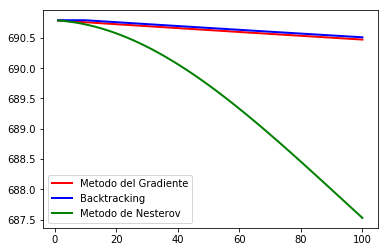

In [34]:
#Ahora graficaremos la norma de la diferencia entre x^T y x estrella para todo T

#Metodo del gradiente: ROJO
plt.plot(u,gm1000[1],color="r", linewidth=2, label='Metodo del Gradiente')

#Backtracking: AZUL
plt.plot(u,bm1000[1],color="b", linewidth=2, label='Backtracking')

#Nesterov: VERDE
plt.plot(u,nm1000[1],color="g", linewidth=2, label='Metodo de Nesterov')

plt.legend(loc='best')
plt.show()

In [35]:
# OBSERVACIONES:
# Al igual que en el caso anterior, los errores del método del gradiente y los de backtracking son muy similares y como estos 
# se mantienen constante, se puede deducir que no hay convergencia, a diferencia del metodo de Nesterov que se ve que tiene 
# errores que siempre decrecen lo cual indica convergencia.

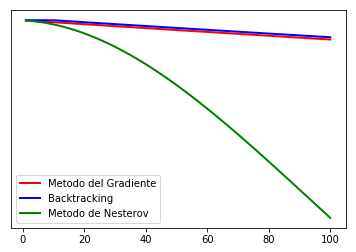

In [36]:
#Ahora graficaremos la norma de la diferencia entre x^T y x estrella para todo T (EN ESCALA LOGARITMICA)

#Metodo del gradiente: ROJO
plt.plot(u,gm1000[1],color="r", linewidth=2, label='Metodo del Gradiente')

#Backtracking: AZUL
plt.plot(u,bm1000[1],color="b", linewidth=2, label='Backtracking')

#Nesterov: VERDE
plt.plot(u,nm1000[1],color="g", linewidth=2, label='Metodo de Nesterov')

plt.yscale('log')
plt.legend(loc='best')
plt.show()

In [37]:
# OBSERVACIONES:
# Al igual que en el caso anterior los errores del método del gradiente y de backtracking son muy similares y medianamente 
# constantes lo que indica que no hay convergencia. Por otro lado, se observa que el método de Nesterov posee errores que 
# decrecen continuamente lo cual nos permite deducir convergencia.